Author: Nicolas Legrand <nicolas.legrand@cfin.au.dk>

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pingouin import madmedianrule
from cardioception.plotting import hrd_convergence, plot_confidence
%matplotlib inline

**Import data**

In [62]:
results_df = pd.read_csv('nicolas.txt')

# Plot convergence

In [57]:
results_df = results_df.dropna()

(<Figure size 864x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x28476c65780>)

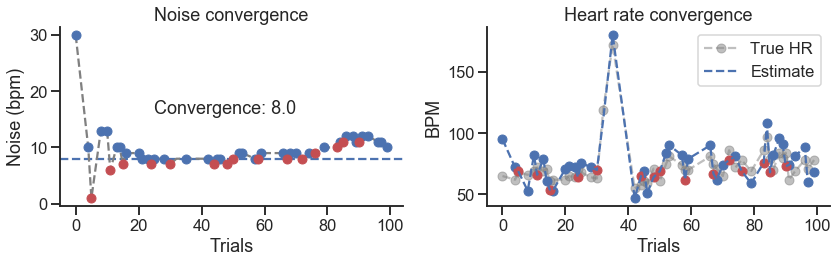

In [76]:
hrd_convergence(results_df[results_df.StairCond==1])

(<Figure size 864x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x28476556fd0>)

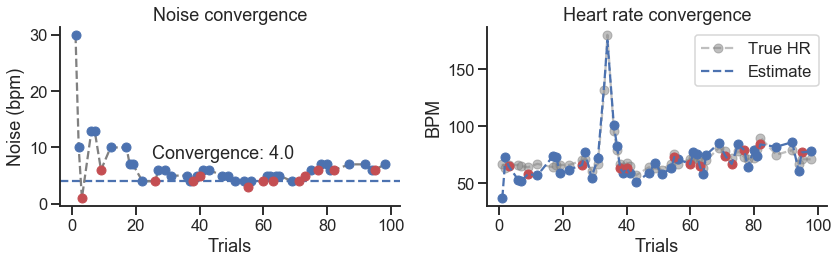

In [64]:
hrd_convergence(results_df[results_df.StairCond==0])

# Confidence rating

(<Figure size 576x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x284783c1e48>)

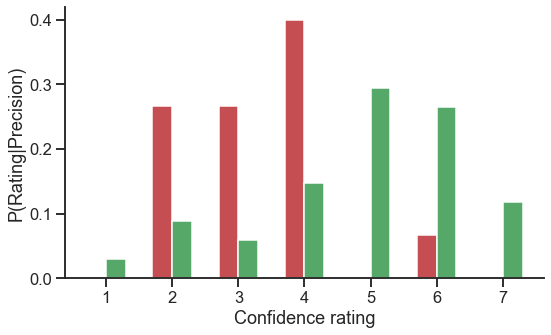

In [78]:
plot_confidence(results_df[results_df.StairCond==1].Confidence, results_df[results_df.StairCond==1].Accuracy)

# Psychometric function using the BayesFit toolbox

References: http://www.slugocm.ca/bayesfit/

Text(0, 0.5, 'Proportion correct')

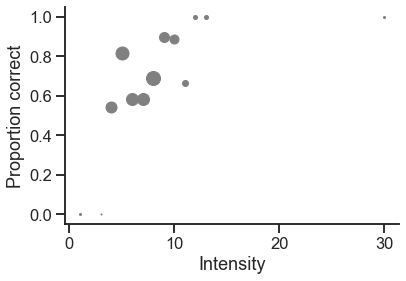

In [71]:
df = results_df.copy()
df.Alpha = np.abs(df.Alpha)
data = np.zeros((len(df.Alpha.unique()), 3))
for ii, intensity in enumerate(np.sort(df.Alpha.unique())):
    p = df[df.Alpha == intensity].Accuracy.mean()
    s= len(df[df.Alpha == intensity])
    plt.plot(intensity, p, marker='o', color='gray', markersize=s)
    
    # Store results
    data[ii, 0] = int(intensity)
    data[ii, 1] = int(len(df[(df.Alpha == intensity) & (df.Accuracy == 1)]))
    data[ii, 2] = int(len(df[(df.Alpha == intensity)]))

sns.despine()
plt.xlabel('Intensity')
plt.ylabel('Proportion correct')

In [72]:
import bayesfit as bf

In [73]:
# Define cumulative normal function to use as sigmoidal function
sigmoid_type = 'norm'

# List of logical arguments which correspond to: scale, slope, gamma, lambda
param_free = [True, True, False, False]

# Define priors for scale and slope parameters (here mu, and sigma)
priors = ['Norm(10,2)', 'Norm(20,2)', None, None]

# Fit model
metrics, options = bf.fitmodel(data, param_free = param_free, priors = priors, sigmoid_type = sigmoid_type)

C:\ProgramData\Anaconda3\lib\site-packages\bayesfit\extractMetrics.py:92: RuntimeWarning: divide by zero encountered in log
  Deviance = 2*np.sum(n*y*np.log(y/p) + n*(1-y)*np.log((1-y)/(1-p)))
C:\ProgramData\Anaconda3\lib\site-packages\bayesfit\extractMetrics.py:92: RuntimeWarning: invalid value encountered in multiply
  Deviance = 2*np.sum(n*y*np.log(y/p) + n*(1-y)*np.log((1-y)/(1-p)))
C:\ProgramData\Anaconda3\lib\site-packages\bayesfit\extractMetrics.py:92: RuntimeWarning: divide by zero encountered in true_divide
  Deviance = 2*np.sum(n*y*np.log(y/p) + n*(1-y)*np.log((1-y)/(1-p)))


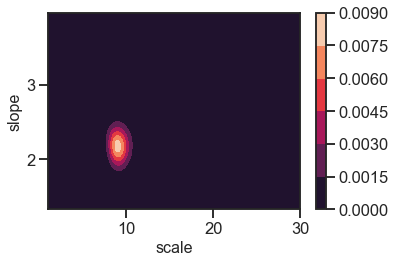

In [74]:
bf.plot_posterior(metrics)

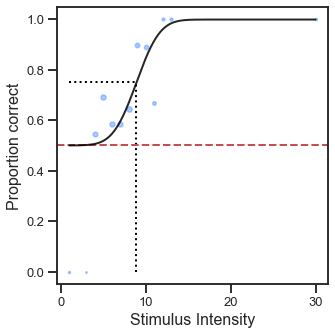

<Figure size 432x288 with 0 Axes>

In [75]:
bf.plot_psyfcn(data, options, metrics)
plt.savefig('psychometric.png', dpi=600)